<a href="https://colab.research.google.com/github/IT24102008/PG151MLProject/blob/IT24102046/Copy_of_IT24102046.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('/content/preprocessed_stroke_data.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,stroke
0,2.305606,1.264816,0.250546,-0.430617,0.834524,0.333307,0.320894,-0.643058,-0.062396,-0.212238,1
1,1.453986,1.647613,-0.484745,0.160239,-1.163737,-0.412336,-0.231320,0.114952,0.208955,-0.247852,1
2,1.571330,-0.416363,-0.638432,0.597845,0.169697,-0.612380,0.748779,0.043821,-0.296528,-0.280570,1
3,1.537974,1.474840,0.641771,0.057266,0.514872,0.671681,-0.587822,0.692612,0.170372,-0.125929,1
4,1.642192,1.709071,-1.520156,0.258872,-1.103096,-0.424797,-0.188216,0.153761,-0.201548,0.639121,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('stroke', axis=1)
y = df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1-score: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

RANDOM_STATE = 42


In [ ]:
# Block 2: split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

print("Class distribution in training data:")
print(pd.Series(y_train).value_counts())



Class distribution in training data:
stroke
0    3889
1     199
Name: count, dtype: int64


In [ ]:
# Block 3: fast pipeline
pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=RANDOM_STATE)),
    ('svc', SVC(random_state=RANDOM_STATE))
])

param_dist = {
    'svc__C': [0.5, 1, 5, 10],
    'svc__gamma': ['scale', 0.1, 0.5],
    'svc__kernel': ['rbf'],
    'svc__class_weight': ['balanced']
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

random_search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=5,                # only 5 random combos
    scoring='precision',     # focus on precision
    n_jobs=-1,
    cv=cv,
    verbose=1,
    random_state=RANDOM_STATE
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters: {'svc__kernel': 'rbf', 'svc__gamma': 'scale', 'svc__class_weight': 'balanced', 'svc__C': 0.5}


In [ ]:
# Block 4: evaluation
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")



Confusion Matrix:
[[773 199]
 [ 22  28]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.87       972
           1       0.12      0.56      0.20        50

    accuracy                           0.78      1022
   macro avg       0.55      0.68      0.54      1022
weighted avg       0.93      0.78      0.84      1022

Precision: 0.1233
Recall: 0.5600


3

In [ ]:

# Block 1: Import Libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix,
    precision_score, recall_score, accuracy_score, f1_score
)
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline



# Block 2: Split Data

RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)


# Block 3: Define Improved SVM Pipeline

pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=RANDOM_STATE, sampling_strategy=0.4)),  # slightly more balancing
    ('svc', SVC(probability=True, random_state=RANDOM_STATE))
])

param_grid = {
    'svc__kernel': ['rbf', 'linear'],
    'svc__C': [0.5, 1, 5, 10],
    'svc__gamma': ['scale', 0.1, 0.01],
    'svc__class_weight': [None, 'balanced']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Optimize F1-score instead of only precision
grid = GridSearchCV(
    pipe,
    param_grid,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)



# Block 4: Train the Model

grid.fit(X_train, y_train)

print("\nBest Parameters Found:")
print(grid.best_params_)

best_model = grid.best_estimator_



# Block 5: Fine Threshold Tuning

y_prob = best_model.decision_function(X_test)
y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # normalize between 0–1

best_f1, best_prec, best_recall, best_acc, best_thresh = 0, 0, 0, 0, 0

for t in np.arange(0.3, 0.95, 0.05):
    y_pred_t = (y_prob >= t).astype(int)
    f1_t = f1_score(y_test, y_pred_t)
    prec_t = precision_score(y_test, y_pred_t, zero_division=0)
    recall_t = recall_score(y_test, y_pred_t, zero_division=0)
    acc_t = accuracy_score(y_test, y_pred_t)
    if f1_t > best_f1:
        best_f1, best_prec, best_recall, best_acc, best_thresh = f1_t, prec_t, recall_t, acc_t, t

print(f"\nBest Threshold: {best_thresh:.2f}")
print(f"Precision: {best_prec:.4f}, Recall: {best_recall:.4f}, F1: {best_f1:.4f}, Accuracy: {best_acc:.4f}")



# Block 6: Final Evaluation

y_pred_final = (y_prob >= best_thresh).astype(int)

print("\nFinal Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, zero_division=0))

print(f"Final Accuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Final Precision: {precision_score(y_test, y_pred_final, zero_division=0):.4f}")
print(f"Final Recall: {recall_score(y_test, y_pred_final, zero_division=0):.4f}")
print(f"Final F1-Score: {f1_score(y_test, y_pred_final):.4f}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Best Parameters Found:
{'svc__C': 1, 'svc__class_weight': None, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

Best Threshold: 0.80
Precision: 0.3158, Recall: 0.4800, F1: 0.3810, Accuracy: 0.9237

Final Confusion Matrix:
[[920  52]
 [ 26  24]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       972
           1       0.32      0.48      0.38        50

    accuracy                           0.92      1022
   macro avg       0.64      0.71      0.67      1022
weighted avg       0.94      0.92      0.93      1022

Final Accuracy: 0.9237
Final Precision: 0.3158
Final Recall: 0.4800
Final F1-Score: 0.3810


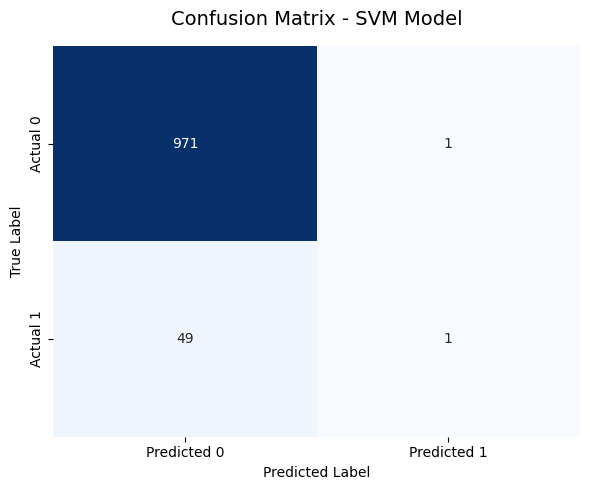

In [40]:

# Block 7: Confusion Matrix Graph

import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_final)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix - SVM Model", fontsize=14, pad=15)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

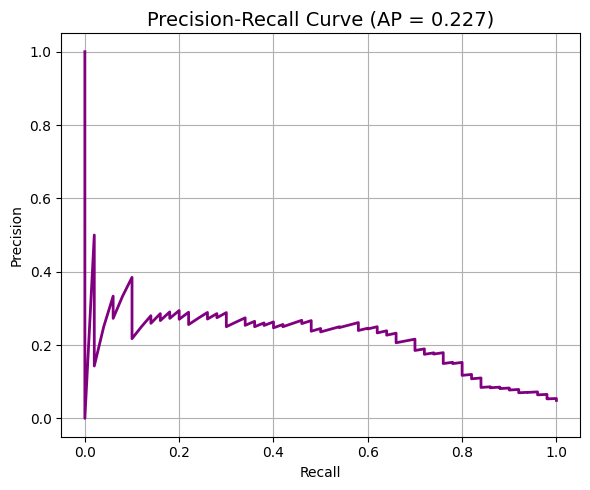

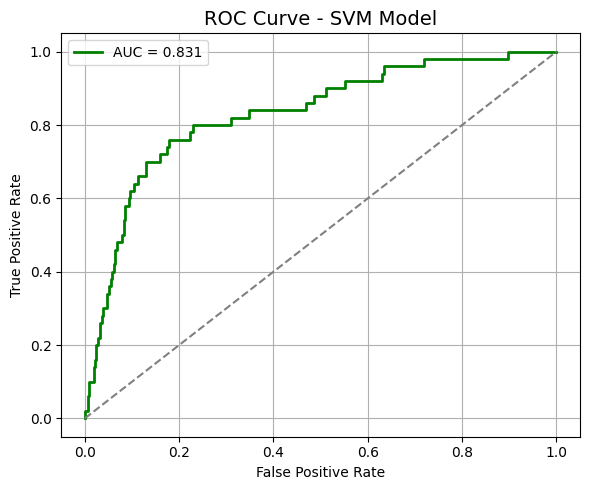

In [41]:
# =============================
# Block 8: Precision-Recall and ROC Curves
# =============================
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score

# Compute metrics
precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_prob)
fpr, tpr, thresholds_roc = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# --- Precision-Recall Curve ---
plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, color='purple', linewidth=2)
plt.title(f"Precision-Recall Curve (AP = {avg_precision:.3f})", fontsize=14)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- ROC Curve ---
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='green', linewidth=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve - SVM Model", fontsize=14)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
